In [10]:
import numpy as np
from numpy import asarray
import heapq
import math
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import random

In [19]:
class pathSearching:  
    def recoverPath(self, pred):
        goal = self.goal
        start = self.start
        p = pred[tuple(goal)]
        path = []
        path.append(goal)
        path.append(p)
        while p!=start:
            pp = p
            p = pred[tuple(pp)]
            path.append(p)
        path.append(s)        
        path = np.flip(path)
        return path
    
    def heuristicCost(self, point0, point1):
        h = math.sqrt(math.pow((point0[0]-point1[0]),2)+math.pow((point0[1]-point1[1]),2))
        return h
    
    def checkQ(self,n):
        neighbor = (n,self.heuristicCost(n,self.goal))
        que = self.Q
        if neighbor in que:
            return True
        else:
            return False
        
    def updateQ(self, neighbor):
        Q = self.Q
        priority = self.EstTotalCost[tuple(neighbor)]
        q = []
        for i in range(0,len(Q)):
            que = heapq.heappop(Q)
            if que[0] == neighbor:
                q.append((neighbor,priority))
            else:
                q.append(que)
        for i in range(0,len(q)):
            heapq.heappush(Q,q[i])
        return Q
            
    def aStarAlgorithm(self, V, s, g, N, w):
        #init
        self.vertex = V
        self.start = s
        self.goal = g
        self.neighbor = N
        self.weight = w
        inf = math.inf
        #Set CostTo and EstTotalCost to inf
        self.CostTo = {}
        self.EstTotalCost = {}
        for k in range(0,len(self.vertex)):
            self.CostTo[tuple(self.vertex[k])] = inf
            self.EstTotalCost[tuple(self.vertex[k])] = inf
        self.CostTo[tuple(self.start)] = 0
        self.EstTotalCost[tuple(self.start)] = self.heuristicCost(self.start, self.goal)
        self.Q = []
        heapq.heappush(self.Q,(self.start,self.heuristicCost(self.start, self.goal)))
        pred = {}
        pvi = {}
       
        #calculate
        while len(self.Q) > 0:
            howManyWhiles = howManyWhiles+1
            v = heapq.heappop(self.Q)
            if v[0] == self.goal:
                print("path done and v[0] is", v[0])
                path = self.recoverPath(pred)
                return path
            
            #check if neighbor is none
            if tuple(v[0]) in self.neighbor:
                pass
            else:
                print("There is no neighbor of",v[0])
                return self.Q
               
            for neighbor in enumerate(self.neighbor[tuple(v[0])]):
                pvi[tuple(neighbor[1])] = self.CostTo[tuple(v[0])]+self.weight[tuple([tuple(neighbor[1]),tuple(v[0])])]
                if pvi[tuple(neighbor[1])] < self.CostTo[tuple(neighbor[1])]:
                    pred[tuple(neighbor[1])] = v[0]
                    self.CostTo[tuple(neighbor[1])] = pvi[tuple(neighbor[1])]
                    self.EstTotalCost[tuple(neighbor[1])] = pvi[tuple(neighbor[1])]+self.heuristicCost(neighbor[1], self.goal)
                    if self.checkQ(neighbor[1]):
                        self.updateQ(neighbor[1])
                    else:
                        heapq.heappush(self.Q,(neighbor[1],self.heuristicCost(neighbor[1], self.goal)))
        else:
            print("There is no path to goal")
                

In [16]:
def vertexCreate():
        im = Image.open("C:/Users/Delia/Desktop/gridmaps/occupancy_map.png")
        data = asarray(im)
        m = np.ones(data.shape)
        v = []
        edge = []
        #create vertices
        for i in range(0, len(data)):    
            for j in range(0, len(data[i])):
                if data[i][j]==0:
                    m[i][j] = 0
                elif data[i][j]==255:
                    m[i][j] = 1
                    v.append([i,j])
        return v
    
def neighborOfVertices(v):
        N = {}
        for i in range(0,len(v)):
            vertice0 = v[i]
            for j in range(0,len(v)):
                if j!= i:
                    vertice1 = v[j]
                    dis = distance(vertice0, vertice1)
                    if dis < 20:#try to set is as 5
                        old = N.get(tuple(vertice0))
                        if old != None:
                            old.append(vertice1)
                            N[tuple(vertice0)] = old
                        else:
                            N[tuple(vertice0)] = [vertice1]

        for i in range(0,len(v)):
            if tuple(v[i]) in N:
                pass
            else:
                N[tuple(v[i])] = []
        return N
    
def weight(N, v):
    weight = {}
    for i in v:
        neighbor = N[tuple(i)]
        for j in range(0, len(neighbor)):
            if np.isscalar(neighbor[j]):
                w = distance(i, neighbor)
                weight[tuple(tuple(i),tuple(neighbor))] = w
            else:
                w = distance(i, neighbor[j])
                weight[tuple([tuple(i),tuple(neighbor[j])])] = w
    return weight

def distance(point0, point1):
        h = math.sqrt(math.pow((point0[0]-point1[0]),2)+math.pow((point0[1]-point1[1]),2))
        return h

In [17]:
s = [635,140]
g = [350,400]
v = vertexCreate()
random.seed(10)
vv = list(random.sample(v, 2000))
vv.append(s)
vv.append(g)
N = neighborOfVertices(vv)
n = np.array(list(N.keys()))
nx = n[:,0]
ny = n[:,1]
w = weight(N,vv)

In [20]:
p = pathSearching()
path = p.aStarAlgorithm(vv, s, g, N, w)

path done and v[0] is [350, 400]
[[140 635]
 [140 635]
 [130 619]
 [127 601]
 [125 584]
 [108 576]
 [115 560]
 [101 549]
 [100 534]
 [102 520]
 [106 502]
 [ 99 484]
 [ 99 465]
 [116 457]
 [134 455]
 [145 454]
 [158 463]
 [176 459]
 [181 440]
 [186 422]
 [183 408]
 [179 398]
 [175 380]
 [194 378]
 [200 367]
 [196 353]
 [195 345]
 [194 331]
 [196 318]
 [207 303]
 [222 296]
 [237 286]
 [251 274]
 [260 262]
 [266 258]
 [275 248]
 [291 242]
 [301 235]
 [317 229]
 [327 228]
 [338 227]
 [354 227]
 [362 227]
 [377 225]
 [385 225]
 [400 227]
 [407 238]
 [425 246]
 [441 255]
 [443 270]
 [443 288]
 [447 302]
 [439 317]
 [426 330]
 [420 333]
 [411 344]
 [400 350]]


In [27]:
def pathVisualization(path):
    x = path[:,0]
    y = path[:,1]
    im = Image.open("C:/Users/Delia/Desktop/gridmaps/occupancy_map.png")
    plt.imshow(im)
    plt.scatter(ny, nx, s=5)
    plt.scatter(s[1], s[0], s=20, c='red')
    plt.scatter(g[1], g[0], s=20, c='cyan')
    plt.plot(x,y,'w',linewidth=2)
    plt.savefig('aStar.png')
    #calculate length
    length = 0
    for i in range(0,len(path)):
        if i < len(path)-1:
            dis = distance(path[i],path[i+1])
            length = length+dis
        else:
            return length

length is: 844.3660077421625


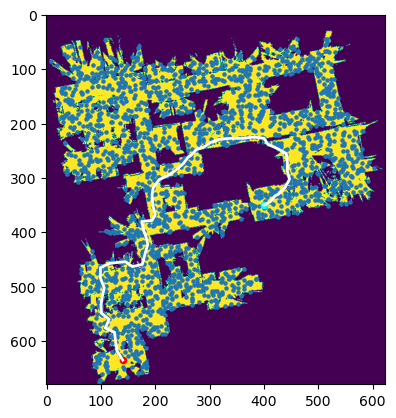

In [28]:
length = pathVisualization(path)
print("length is:",length)